# Clustering Analysis

This notebook performs clustering analysis on the preprocessed dataset. The steps include finding the optimal number of clusters using the elbow method, training a K-Means clustering model, visualizing the clusters, and saving the results.

## Step 1: Upload the Training and Testing Datasets

In this step, you will upload the preprocessed training and testing datasets generated from the previous preprocessing steps.

In [1]:
from google.colab import files
import pandas as pd

# Upload the training and testing datasets
uploaded = files.upload()

# Load the training and testing datasets
X_train_scaled = pd.read_csv('X_train_scaled.csv')
X_test_scaled = pd.read_csv('X_test_scaled.csv')
y_train = pd.read_csv('y_train.csv')
y_test = pd.read_csv('y_test.csv')

# Display the first few rows of the training data
X_train_scaled.head()

Saving y_test.csv to y_test.csv
Saving y_train.csv to y_train.csv
Saving X_test_scaled.csv to X_test_scaled.csv
Saving X_train_scaled.csv to X_train_scaled.csv


,SeniorCitizen,tenure,MonthlyCharges,gender_Male,Dependents_Yes,PhoneService_Yes,MultipleLines_Yes,InternetService_Fiber optic,Contract_One year,Contract_Two year
0,-0.440138,-0.921304,0.354467,-0.994253,-0.658980,0.332933,1.153609,1.125632,-0.513363,-0.564315
1,-0.440138,1.567905,0.407951,-0.994253,-0.658980,0.332933,-0.866845,-0.888390,-0.513363,1.772059
2,-0.440138,-0.431624,-1.333629,1.005780,-0.658980,0.332933,1.153609,-0.888390,-0.513363,1.772059
3,-0.440138,-1.166144,0.947807,-0.994253,-0.658980,0.332933,1.153609,1.125632,-0.513363,-0.564315
4,-0.440138,-1.002918,-1.504109,1.005780,1.517497,0.332933,-0.866845,-0.888390,-0.513363,1.772059


## Step 2: Finding the Optimal Number of Clusters

We use the elbow method to determine the optimal number of clusters. This method involves plotting the Within-Cluster Sum of Squares (WCSS) against the number of clusters. The point where the WCSS starts to decrease more slowly (forming an 'elbow') is considered the optimal number of clusters.

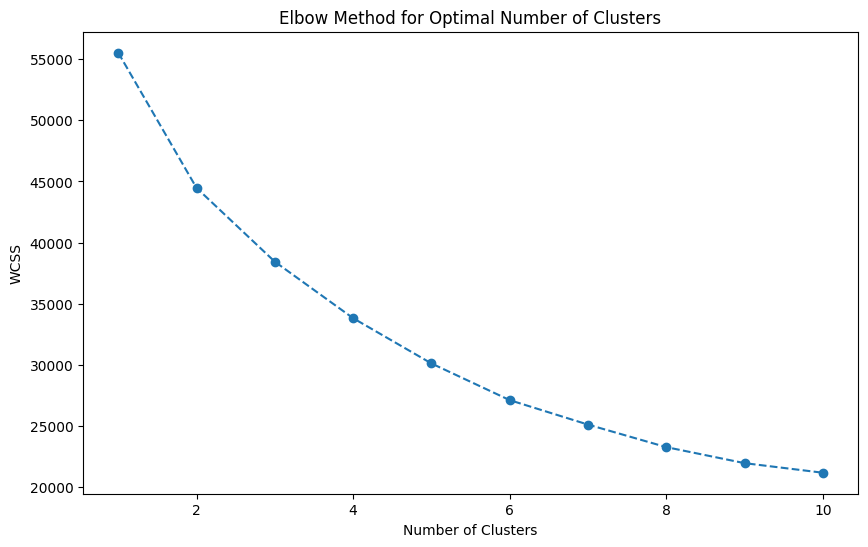

In [2]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Calculate WCSS for different number of clusters
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=42)
    kmeans.fit(X_train_scaled)
    wcss.append(kmeans.inertia_)

# Plot the Elbow graph
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), wcss, marker='o', linestyle='--')
plt.title('Elbow Method for Optimal Number of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

## Step 3: Training the K-Means Model

Based on the Elbow method, we determine the optimal number of clusters and train the K-Means model using this number.

In [3]:
# Assuming the optimal number of clusters is 3 based on the Elbow method (adjust if different)
optimal_clusters = 3

# Train the K-Means model
kmeans = KMeans(n_clusters=optimal_clusters, init='k-means++', max_iter=300, n_init=10, random_state=42)
kmeans.fit(X_train_scaled)

# Predict the clusters for the training data
clusters = kmeans.predict(X_train_scaled)

# Add the cluster labels to the training data
X_train_scaled['Cluster'] = clusters

# Display the first few rows of the data with cluster labels
X_train_scaled.head()

,SeniorCitizen,tenure,MonthlyCharges,gender_Male,Dependents_Yes,PhoneService_Yes,MultipleLines_Yes,InternetService_Fiber optic,Contract_One year,Contract_Two year,Cluster
0,-0.440138,-0.921304,0.354467,-0.994253,-0.658980,0.332933,1.153609,1.125632,-0.513363,-0.564315,0
1,-0.440138,1.567905,0.407951,-0.994253,-0.658980,0.332933,-0.866845,-0.888390,-0.513363,1.772059,2
2,-0.440138,-0.431624,-1.333629,1.005780,-0.658980,0.332933,1.153609,-0.888390,-0.513363,1.772059,2
3,-0.440138,-1.166144,0.947807,-0.994253,-0.658980,0.332933,1.153609,1.125632,-0.513363,-0.564315,0
4,-0.440138,-1.002918,-1.504109,1.005780,1.517497,0.332933,-0.866845,-0.888390,-0.513363,1.772059,2


## Step 4: Visualizing the Clusters

We reduce the dimensionality of the dataset to two principal components using PCA for better visualization of the clusters. The clusters are then plotted to help interpret the results.

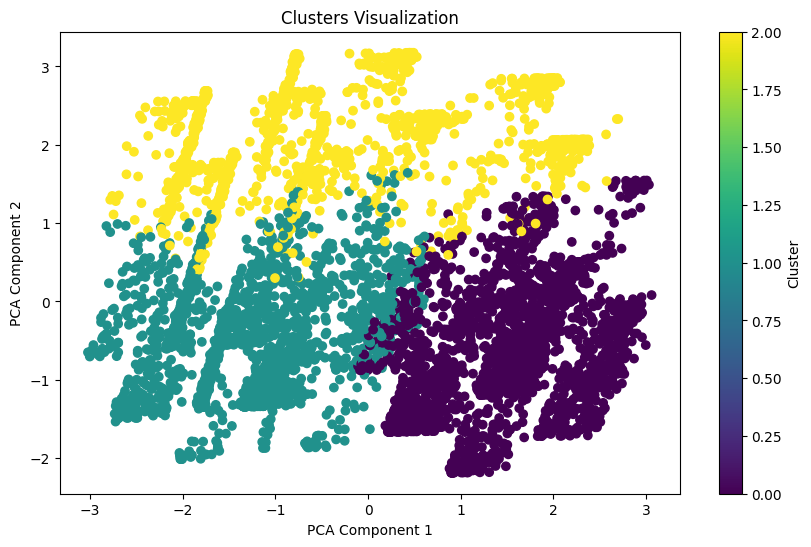

In [4]:
from sklearn.decomposition import PCA

# Reduce the dimensionality of the data to 2 components using PCA
pca = PCA(n_components=2)
pca_components = pca.fit_transform(X_train_scaled.drop('Cluster', axis=1))

# Plot the clusters
plt.figure(figsize=(10, 6))
plt.scatter(pca_components[:, 0], pca_components[:, 1], c=X_train_scaled['Cluster'], cmap='viridis', marker='o')
plt.title('Clusters Visualization')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.colorbar(label='Cluster')
plt.show()

## Step 5: Saving the Model and Cluster Information

Finally, we save the trained K-Means model, the dataset with cluster labels, and the cluster centers. These can be used for further analysis and interpretation.

In [5]:
import joblib

# Save the trained K-Means model
joblib.dump(kmeans, 'kmeans_model.pkl')

# Save the cluster labels with the training data
X_train_scaled.to_csv('train_with_clusters.csv', index=False)

# Save the cluster centers for interpretation
cluster_centers = pd.DataFrame(kmeans.cluster_centers_, columns=X_train_scaled.columns[:-1])
cluster_centers.to_csv('cluster_centers.csv', index=False)

# Download the model and the cluster data
files.download('kmeans_model.pkl')
files.download('train_with_clusters.csv')
files.download('cluster_centers.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [7]:
# Calculate the mean values for 'tenure' and 'MonthlyCharges' in each cluster directly from the scaled data
# Assuming 'tenure' and 'MonthlyCharges' are still in your X_train_scaled DataFrame

# Calculate the mean values for 'tenure' and 'MonthlyCharges' in each cluster
cluster_insights = X_train_scaled.groupby('Cluster').agg({
    'tenure': 'mean',
    'MonthlyCharges': 'mean'
}).reset_index()

# Display the results
print("Average Tenure and Monthly Charges for each Cluster:")
print(cluster_insights)


Average Tenure and Monthly Charges for each Cluster:
   Cluster    tenure  MonthlyCharges
0        0 -0.158967        0.813187
1        1 -0.458012       -0.759003
2        2  1.009578       -0.173317
